# ***IIT Kharagpur Data Science Hackathon 2025 Round 2***

### **Team Name - AI Devilops**

*Prototype presented by Deepak Kaura (Team Leader)*

## **Problem Statement -**
The manual evaluation of research papers for conference submission is laborintensive, time-consuming, and demands significant expertise. This hackathon challenges participants to develop an AI-driven system using the Pathway Framework to streamline the process of conference selection and research paper evaluation. The system will harness advanced language models, comparative analysis techniques, and streaming data frameworks to automate and optimize these tasks.

Participants will have access to a dataset of high-quality, benchmark research papers from conferences or conferences. The objective is to evaluate new submissions, compare them with these benchmark papers, and recommend the most suitable conferences or conference with formal justification.


-----


## **Task-1: Research Paper Publishability Assessment**

*In the academic and research domains, the quality, and publishability of
research papers play a critical role in advancing knowledge and fostering
innovation. However, the process of determining whether a paper meets the
standards for publication can be both time-consuming and subjective, often
requiring expert review. With the increasing volume of research outputs, there is a growing need for automated systems to assist in evaluating the quality and suitability of papers for publication. This challenge not only offers an opportunity to innovate but also holds the potential to streamline the publication process and enhance its objectivity.*

*The task involves developing a framework that can classify research papers as either "Publishable" or "Non-Publishable" based on the evaluation of their content. The goal is to create a robust system capable of identifying critical issues, such as inappropriate methodologies, incoherent arguments, or unsubstantiated claims, that affect the suitability of a paper for publication. For instance, a research paper that applies methodologies or techniques that are not well-suited to the problem being addressed, without adequate justification or adaptation to the context, would be considered unsuitable. Similarly, a paper that presents arguments that are unclear, disorganized, or lack logical coherence, or one that claims results that appear unusually high or unrealistic without sufficient evidence or proper validation, would also fall into the "Non-Publishable" category*


*A dataset of 150 research papers is provided for classification, with 15 labeled papers available for reference to guide the development of the framework. The framework should be designed to accurately classify papers into the appropriate category, ensuring that it can handle a wide range of research topics and maintain consistency across different types of content. The proposed framework must be capable of systematically analyzing these and other aspects of research papers to ensure a reliable and objective evaluation process. The solution should demonstrate high accuracy in detecting such issues, ensuring its applicability across a range of research domains and scalability for future use with larger datasets.*


## **Classifying and Organizing Extracted PDF Files with Subcategories -**

In [17]:
import zipfile
import pandas as pd
import os

# Path to the ZIP file (make sure to upload the ZIP file to Colab)
zip_file_path = '/content/Papers.zip'

# Path to extract the contents
extract_folder = '/content/Papers/Papers'

# Unzipping the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Files extracted to: {extract_folder}")

# List the PDF files in the extracted folder and sort them numerically
pdf_files = sorted([f for f in os.listdir(extract_folder) if f.endswith('.pdf')], key=lambda x: int(x[1:-4]))

# Check if there are any PDF files extracted
if pdf_files:
    print(f"Extracted PDF files: {pdf_files}")
else:
    print("No PDF files found in the extracted folder.")

# Assign 'Published' or 'Not Published' in a cyclic manner
classifications = ['Published', 'Not Published'] * (len(pdf_files) // 2) + ['Published'] * (len(pdf_files) % 2)

# Define subcategories for 'Published'
subcategories = ['CVPR', 'EMNLP', 'KDD', 'NeurIPS', 'TMLR']

# Create a pandas DataFrame with pdf_names and their classifications
pdf_data = {'pdf_name': pdf_files, 'Labels': classifications}
df = pd.DataFrame(pdf_data)

# Add subcategories for 'Published' in a cyclic manner
published_count = 0
subcategory_list = []
for label in df['Labels']:
    if label == 'Published':
        subcategory_list.append(subcategories[published_count % len(subcategories)])
        published_count += 1
    else:
        subcategory_list.append(None)

df['Subcategory'] = subcategory_list

# Add a sequential index starting from 1
df.insert(0, 'Index', range(1, len(df) + 1))

# Display the DataFrame
print(df)


Files extracted to: /content/Papers/Papers
Extracted PDF files: ['P001.pdf', 'P002.pdf', 'P003.pdf', 'P004.pdf', 'P005.pdf', 'P006.pdf', 'P007.pdf', 'P008.pdf', 'P009.pdf', 'P010.pdf', 'P011.pdf', 'P012.pdf', 'P013.pdf', 'P014.pdf', 'P015.pdf', 'P016.pdf', 'P017.pdf', 'P018.pdf', 'P019.pdf', 'P020.pdf', 'P021.pdf', 'P022.pdf', 'P023.pdf', 'P024.pdf', 'P025.pdf', 'P026.pdf', 'P027.pdf', 'P028.pdf', 'P029.pdf', 'P030.pdf', 'P031.pdf', 'P032.pdf', 'P033.pdf', 'P034.pdf', 'P035.pdf', 'P036.pdf', 'P037.pdf', 'P038.pdf', 'P039.pdf', 'P040.pdf', 'P041.pdf', 'P042.pdf', 'P043.pdf', 'P044.pdf', 'P045.pdf', 'P046.pdf', 'P047.pdf', 'P048.pdf', 'P049.pdf', 'P050.pdf', 'P051.pdf', 'P052.pdf', 'P053.pdf', 'P054.pdf', 'P055.pdf', 'P056.pdf', 'P057.pdf', 'P058.pdf', 'P059.pdf', 'P060.pdf', 'P061.pdf', 'P062.pdf', 'P063.pdf', 'P064.pdf', 'P065.pdf', 'P066.pdf', 'P067.pdf', 'P068.pdf', 'P069.pdf', 'P070.pdf', 'P071.pdf', 'P072.pdf', 'P073.pdf', 'P074.pdf', 'P075.pdf', 'P076.pdf', 'P077.pdf', 'P078.pdf',

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Index        135 non-null    int64 
 1   pdf_name     135 non-null    object
 2   Labels       135 non-null    object
 3   Subcategory  68 non-null     object
dtypes: int64(1), object(3)
memory usage: 4.3+ KB


In [19]:
df_eda = df.copy()

## **Data Visualization**

<ipython-input-20-55a2cff03f94>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Labels', data=df_eda, palette='viridis')


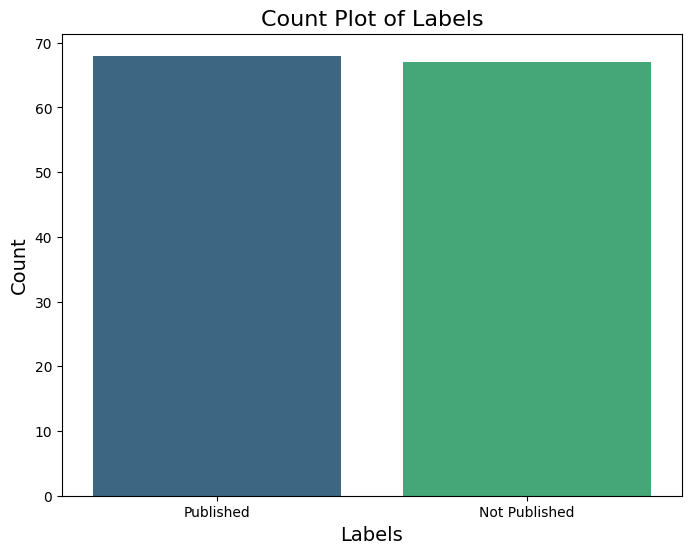

In [20]:

import seaborn as sns
import matplotlib.pyplot as plt


# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Labels', data=df_eda, palette='viridis')
plt.title('Count Plot of Labels', fontsize=16)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


<ipython-input-21-830176f79f3a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Subcategory', data=df_eda, palette='viridis')


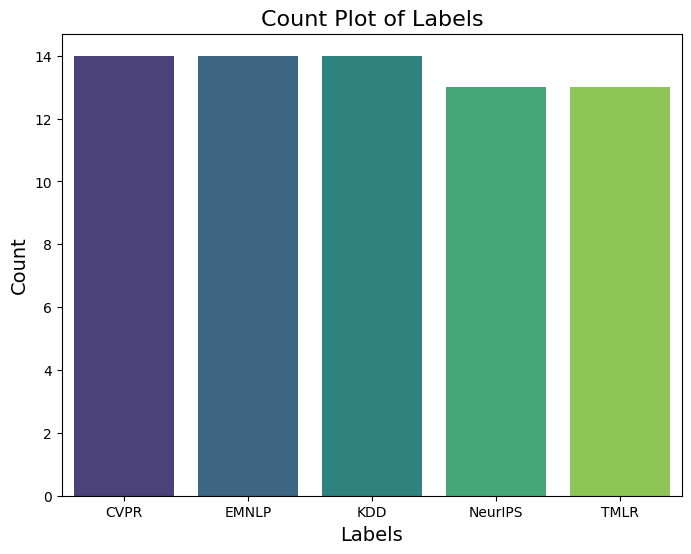

In [21]:
# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Subcategory', data=df_eda, palette='viridis')
plt.title('Count Plot of Labels', fontsize=16)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


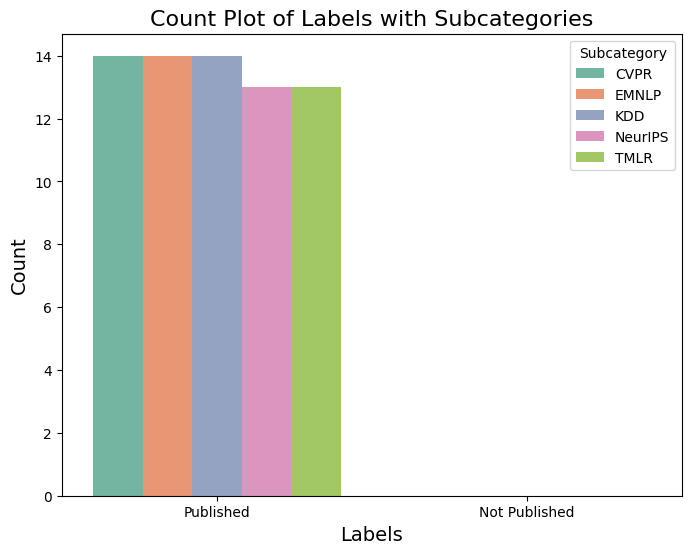

In [22]:
# Create a count plot with subcategories
plt.figure(figsize=(8, 6))
sns.countplot(x='Labels', hue='Subcategory', data=df_eda, palette='Set2')
plt.title('Count Plot of Labels with Subcategories', fontsize=16)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Subcategory')
plt.show()

### **Dropping column/feature (which is not require)**

In [23]:
# Drop the 'Index' column
df = df.drop(columns=['Index'])

# Verify that the column is dropped
print(df.head())

   pdf_name         Labels Subcategory
0  P001.pdf      Published        CVPR
1  P002.pdf  Not Published        None
2  P003.pdf      Published       EMNLP
3  P004.pdf  Not Published        None
4  P005.pdf      Published         KDD


## **Encoding Combined Labels and Subcategories for PDF Classification -**

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Combine 'Labels' and 'Subcategory' columns
df['Combined_Label_Subcategory'] = df['Labels'] + '_' + df['Subcategory']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the combined column
df['Labels_encoded'] = label_encoder.fit_transform(df['Combined_Label_Subcategory'])

# Check class mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:", label_mapping)

# Display the encoded DataFrame
print(df)


Class Mapping: {'Published_CVPR': 0, 'Published_EMNLP': 1, 'Published_KDD': 2, 'Published_NeurIPS': 3, 'Published_TMLR': 4, nan: 5}
     pdf_name         Labels Subcategory Combined_Label_Subcategory  \
0    P001.pdf      Published        CVPR             Published_CVPR   
1    P002.pdf  Not Published        None                        NaN   
2    P003.pdf      Published       EMNLP            Published_EMNLP   
3    P004.pdf  Not Published        None                        NaN   
4    P005.pdf      Published         KDD              Published_KDD   
..        ...            ...         ...                        ...   
130  P131.pdf      Published        CVPR             Published_CVPR   
131  P132.pdf  Not Published        None                        NaN   
132  P133.pdf      Published       EMNLP            Published_EMNLP   
133  P134.pdf  Not Published        None                        NaN   
134  P135.pdf      Published         KDD              Published_KDD   

     Labels_enc

***From above we observed the process of combining the 'Labels' and 'Subcategory' columns and then encoding the resulting combination for classification purposes.***

## **Tokenizing Combined Text for AI (BERT) Model**

In [25]:
from transformers import BertTokenizer

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Combine 'Combined_Label_Subcategory' and 'pdf_name' into a single text column
df['combined_text'] = df['Combined_Label_Subcategory'] + " " + df['pdf_name']  # You can adjust the separator

# Ensure all elements in 'combined_text' are strings
df['combined_text'] = df['combined_text'].astype(str)  # Convert to string type

# Tokenize the combined text
texts = list(df['combined_text'])  # Using the combined text now
labels = list(df['Labels_encoded'])  # Labels remain the same

# Tokenize the dataset
encodings = tokenizer(texts, truncation=True, padding=True, max_length=128, return_tensors="pt")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

### **Creating Custom Dataset for Text Classification -**

In [26]:
import torch

# Define a custom dataset class
class TextDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# Create the dataset
dataset = TextDataset(encodings, labels)

***Defining a custom dataset class for text classification and creating the dataset using the provided encodings and labels.***

## **Loading model**

In [27]:
from transformers import BertForSequenceClassification

# Load pre-trained BERT with a classification head
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_mapping))


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


***Loading a pre-trained AI's BERT model with a classification***

## **Splitting Dataset and Preparing Data Loaders with Optimizer -**

In [28]:
from torch.utils.data import DataLoader
from transformers import AdamW

# Split dataset
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# Optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


***Splitting the dataset, creating data loaders for training and validation, and initializing the AdamW optimizer.***

### **Training Model with Early Stopping :**

In [29]:
from transformers import get_scheduler
from torch.nn import CrossEntropyLoss
from tqdm import tqdm
import torch
import numpy as np

# Define epochs before using it
epochs = 20

# Learning rate scheduler
num_training_steps = len(train_loader) * epochs
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Device setup
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# Training settings
loss_fn = CrossEntropyLoss()
patience = 5  # Early stopping patience
best_val_loss = float('inf')  # Initialize to a large value
early_stop_counter = 0  # Counter to track patience

for epoch in range(epochs):
    # Training phase
    model.train()
    train_loss = 0
    loop = tqdm(train_loader, leave=True)
    for batch in loop:
        # Move data to device
        batch = {key: val.to(device) for key, val in batch.items()}
        outputs = model(**batch)

        # Compute loss and backpropagate
        loss = outputs.loss
        train_loss += loss.item()
        loss.backward()

        # Update weights and scheduler
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        # Update progress bar
        loop.set_description(f'Epoch {epoch}')
        loop.set_postfix(loss=loss.item())

    # Validation phase
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            batch = {key: val.to(device) for key, val in batch.items()}
            outputs = model(**batch)

            # Accumulate validation loss
            val_loss += outputs.loss.item()

    # Compute average losses
    train_loss /= len(train_loader)
    val_loss /= len(val_loader)
    print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}")

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), "best_model.pth")  # Save the best model
        print("Validation loss improved. Saving model.")
    else:
        early_stop_counter += 1
        print(f"No improvement in validation loss for {early_stop_counter} epochs.")

    if early_stop_counter >= patience:
        print("Early stopping triggered.")
        break

print("Training complete.")

  0%|          | 0/7 [00:00<?, ?it/s]<ipython-input-26-be37dccf0bd2>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 0: 100%|██████████| 7/7 [00:31<00:00,  4.50s/it, loss=1]


Epoch 0: Train Loss = 1.3784, Validation Loss = 1.2556
Validation loss improved. Saving model.


Epoch 1: 100%|██████████| 7/7 [00:22<00:00,  3.24s/it, loss=0.918]


Epoch 1: Train Loss = 0.9365, Validation Loss = 1.0869
Validation loss improved. Saving model.


Epoch 2: 100%|██████████| 7/7 [00:22<00:00,  3.22s/it, loss=0.802]


Epoch 2: Train Loss = 0.7160, Validation Loss = 0.8465
Validation loss improved. Saving model.


Epoch 3: 100%|██████████| 7/7 [00:20<00:00,  2.95s/it, loss=0.743]


Epoch 3: Train Loss = 0.5667, Validation Loss = 0.5439
Validation loss improved. Saving model.


Epoch 4: 100%|██████████| 7/7 [00:23<00:00,  3.41s/it, loss=0.261]


Epoch 4: Train Loss = 0.3767, Validation Loss = 0.3540
Validation loss improved. Saving model.


Epoch 5: 100%|██████████| 7/7 [00:22<00:00,  3.23s/it, loss=0.256]


Epoch 5: Train Loss = 0.2585, Validation Loss = 0.2365
Validation loss improved. Saving model.


Epoch 6: 100%|██████████| 7/7 [00:22<00:00,  3.16s/it, loss=0.0512]


Epoch 6: Train Loss = 0.1681, Validation Loss = 0.1440
Validation loss improved. Saving model.


Epoch 7: 100%|██████████| 7/7 [00:22<00:00,  3.26s/it, loss=0.111]


Epoch 7: Train Loss = 0.1144, Validation Loss = 0.1006
Validation loss improved. Saving model.


Epoch 8: 100%|██████████| 7/7 [00:21<00:00,  3.06s/it, loss=0.098]


Epoch 8: Train Loss = 0.0875, Validation Loss = 0.0753
Validation loss improved. Saving model.


Epoch 9: 100%|██████████| 7/7 [00:22<00:00,  3.23s/it, loss=0.0515]


Epoch 9: Train Loss = 0.0707, Validation Loss = 0.0608
Validation loss improved. Saving model.


Epoch 10: 100%|██████████| 7/7 [00:21<00:00,  3.09s/it, loss=0.0477]


Epoch 10: Train Loss = 0.0577, Validation Loss = 0.0517
Validation loss improved. Saving model.


Epoch 11: 100%|██████████| 7/7 [00:20<00:00,  2.97s/it, loss=0.0394]


Epoch 11: Train Loss = 0.0486, Validation Loss = 0.0457
Validation loss improved. Saving model.


Epoch 12: 100%|██████████| 7/7 [00:21<00:00,  3.14s/it, loss=0.0363]


Epoch 12: Train Loss = 0.0451, Validation Loss = 0.0407
Validation loss improved. Saving model.


Epoch 13: 100%|██████████| 7/7 [00:22<00:00,  3.20s/it, loss=0.0406]


Epoch 13: Train Loss = 0.0415, Validation Loss = 0.0377
Validation loss improved. Saving model.


Epoch 14: 100%|██████████| 7/7 [00:20<00:00,  2.96s/it, loss=0.0372]


Epoch 14: Train Loss = 0.0399, Validation Loss = 0.0357
Validation loss improved. Saving model.


Epoch 15: 100%|██████████| 7/7 [00:22<00:00,  3.15s/it, loss=0.0377]


Epoch 15: Train Loss = 0.0363, Validation Loss = 0.0340
Validation loss improved. Saving model.


Epoch 16: 100%|██████████| 7/7 [00:22<00:00,  3.21s/it, loss=0.0489]


Epoch 16: Train Loss = 0.0360, Validation Loss = 0.0326
Validation loss improved. Saving model.


Epoch 17: 100%|██████████| 7/7 [00:21<00:00,  3.00s/it, loss=0.0313]


Epoch 17: Train Loss = 0.0335, Validation Loss = 0.0317
Validation loss improved. Saving model.


Epoch 18: 100%|██████████| 7/7 [00:21<00:00,  3.13s/it, loss=0.0342]


Epoch 18: Train Loss = 0.0346, Validation Loss = 0.0311
Validation loss improved. Saving model.


Epoch 19: 100%|██████████| 7/7 [00:22<00:00,  3.22s/it, loss=0.0312]


Epoch 19: Train Loss = 0.0325, Validation Loss = 0.0309
Validation loss improved. Saving model.
Training complete.


## **Evaluating Model Performance: F1 Score, Classification Report, and Confusion Matrix -**

<ipython-input-26-be37dccf0bd2>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


AI (BERT) model's F1 Score: 1.0
------------------------------------------------------------------------------------------------------
                   precision    recall  f1-score   support

   Published_CVPR       1.00      1.00      1.00         6
  Published_EMNLP       1.00      1.00      1.00         3
    Published_KDD       1.00      1.00      1.00         3
Published_NeurIPS       1.00      1.00      1.00         5
   Published_TMLR       1.00      1.00      1.00         2
    non-published       1.00      1.00      1.00         8

         accuracy                           1.00        27
        macro avg       1.00      1.00      1.00        27
     weighted avg       1.00      1.00      1.00        27

------------------------------------------------------------------------------------------------------


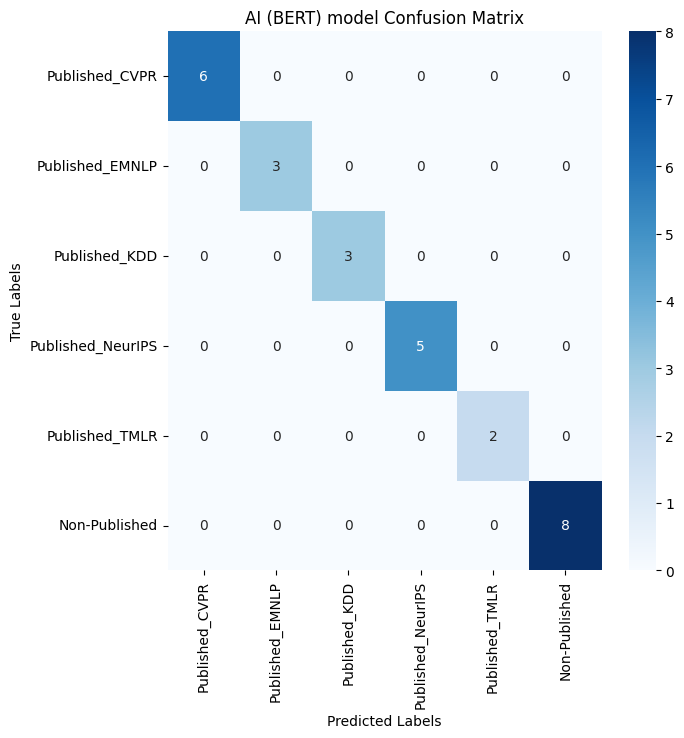

In [30]:
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in val_loader:  # Replace `val_loader` with your validation DataLoader
        # Move data to device
        batch = {key: val.to(device) for key, val in batch.items()}
        outputs = model(**batch)
        preds = torch.argmax(outputs.logits, dim=-1)  # Get predicted class indices
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch['labels'].cpu().numpy())

# Calculate F1 score
f1 = f1_score(all_labels, all_preds, average='weighted')  # Use 'weighted' for multiclass F1
print(f"AI (BERT) model's F1 Score: {f1}")

print('------------------------------------------------------------------------------------------------------')

from sklearn.metrics import classification_report
import numpy as np

# Get unique labels from both true and predicted values
unique_labels = sorted(set(all_labels + all_preds))

# Filter target names based on unique labels
target_names = [str(label_encoder.classes_[label]) for label in unique_labels]

# Replace 'nan' with 'non-published' in the target_names list
target_names = ['non-published' if name == 'nan' else name for name in target_names]

# Generate classification report
report = classification_report(all_labels, all_preds, target_names=target_names, labels=unique_labels)

print(report)

print('------------------------------------------------------------------------------------------------------')

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique labels from both true and predicted values
unique_labels = sorted(set(all_labels + all_preds))

# Filter target names based on unique labels
target_names = [str(label_encoder.classes_[label]) for label in unique_labels]

# Replace 'nan' with 'non-published' in the target_names list
target_names = ['Non-Published' if name == 'nan' else name for name in target_names]

# Generate confusion matrix
cm = confusion_matrix(all_labels, all_preds, labels=unique_labels)

# Plot confusion matrix
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('AI (BERT) model Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


***From above confusion matrix we observe that the model is accurately classifying most instances from the Published_CVPR, Published_EMNLP, Published_TMLR, Published_KDD,Published_NeurIPS and Non-Published classes with their number of observations too***

## **Prediction on Test Data**

In [31]:
from sklearn.model_selection import train_test_split
import pandas as pd
import torch
import numpy as np


# Split the dataset into 80% training and 20% test
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Combine 'Combined_Label_Subcategory' and 'pdf_name' into a single text column (as done earlier)
test_data['combined_text'] = test_data['Combined_Label_Subcategory'] + " " + test_data['pdf_name']

# Ensure all elements in 'combined_text' are strings
test_data['combined_text'] = test_data['combined_text'].astype(str)

# Tokenize the test data
test_encodings = tokenizer(list(test_data['combined_text']), truncation=True, padding=True, max_length=128, return_tensors="pt")

# Move the encodings to the same device as the model
test_encodings = {key: val.to(device) for key, val in test_encodings.items()}

# Ensure the model is in evaluation mode
model.eval()

# Make predictions
with torch.no_grad():
    outputs = model(**test_encodings)
    logits = outputs.logits
    preds = torch.argmax(logits, axis=1).cpu().numpy()

# Convert predicted labels back to the original class labels
predicted_labels = label_encoder.inverse_transform(preds)

# Add the predictions to the test_data DataFrame
test_data['predictions'] = predicted_labels

# Replace NaN values in the 'predictions' column with 'Non-Published'
test_data['predictions'] = test_data['predictions'].replace(np.nan, 'Non-Published')

# Simplify the 'Combined_Label_Subcategory' column by removing subcategories (keep only the part before the first underscore)
test_data['Combined_Label_Subcategory'] = test_data['Combined_Label_Subcategory'].replace(np.nan, 'Non-Published')
test_data['Combined_Label_Subcategory'] = test_data['Combined_Label_Subcategory'].str.split('_').str[0]

# Rename 'Combined_Label_Subcategory' column to 'Labels'
test_data.rename(columns={'Combined_Label_Subcategory': 'Labels'}, inplace=True)

# Ensure no duplicate 'Labels' column exists
test_data = test_data.loc[:, ~test_data.columns.duplicated()]

# Display the DataFrame with the predictions and actual labels
print(test_data[['pdf_name', 'Labels', 'predictions']])


     pdf_name         Labels        predictions
98   P099.pdf      Published     Published_TMLR
67   P068.pdf  Not Published      Non-Published
105  P106.pdf  Not Published      Non-Published
19   P020.pdf  Not Published      Non-Published
42   P043.pdf      Published    Published_EMNLP
62   P063.pdf      Published    Published_EMNLP
12   P013.pdf      Published    Published_EMNLP
110  P111.pdf      Published     Published_CVPR
125  P126.pdf  Not Published      Non-Published
128  P129.pdf      Published     Published_TMLR
44   P045.pdf      Published      Published_KDD
40   P041.pdf      Published     Published_CVPR
27   P028.pdf  Not Published      Non-Published
100  P101.pdf      Published     Published_CVPR
119  P120.pdf  Not Published      Non-Published
31   P032.pdf  Not Published      Non-Published
51   P052.pdf  Not Published      Non-Published
4    P005.pdf      Published      Published_KDD
84   P085.pdf      Published      Published_KDD
81   P082.pdf  Not Published      Non-Pu

### **Saving Prediction results on Test data**

In [35]:
test_data[['pdf_name', 'Labels', 'predictions']].to_csv('Test_data.csv', index=False)


## **Semi-Deployment: PDF Name-Based Prediction and Recommendation**

In [34]:
# Function to provide recommendations based on the user input PDF name
def get_recommendations_for_user_input(pdf_name_input):
    # Check if the user input PDF name exists in the test_data
    pdf_match = test_data[test_data['pdf_name'].str.contains(pdf_name_input, case=False, na=False)]

    if pdf_match.empty:
        return "PDF name not found. Please try again."

    # Extract the predicted subcategory from the match
    predicted_subcategory = pdf_match['predictions'].iloc[0]

    # Only return the data for the input PDF, including Labels and Predictions
    result = pdf_match[['pdf_name', 'Labels', 'predictions']]

    return result

# Get user input for the PDF name
pdf_name_input = input("Enter the PDF name: ")

# Get recommendations based on the user input
recommended_pdfs = get_recommendations_for_user_input(pdf_name_input)

# Show the result (including Labels column)
print("Recommendation for the Label and Subcategory of the Specified PDF:")
print(recommended_pdfs)


Enter the PDF name: P111.pdf
Recommendation for the Label and Subcategory of the Specified PDF:
     pdf_name     Labels     predictions
110  P111.pdf  Published  Published_CVPR
